# Сборный проект

Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from scipy import stats as st


откроем предложанный датафрейм с информацией . Изучим исходные данные

In [2]:
games = pd.read_csv(r"/datasets/games.csv")
print(games.info())
display(games)
for j in games.columns:
    print()

    print("В колонке  {} зафиксированы следующие уникальные значения: {}.".format(j, games[j].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



В колонке  Name зафиксированы следующие уникальные значения: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'].

В колонке  Platform зафиксированы следующие уникальные значения: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'].

В колонке  Year_of_Release зафиксированы следующие уникальные значения: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.].

В колонке  Genre зафиксированы следующие уникальные значения: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan].

В колонке  NA_sales зафиксированы след

Предварительный вывод: грубых ошибок, противоречащих здравой логике не выявлено. Недостающие данные можно заменить. Дата сет пригоден для анализа.

# Шаг 2. Подготовьте данные

Приведем к нижнему регистру названия столбцов

In [3]:
games.columns=[i.lower() for i in games.columns]
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Проверим нет ли отрицательных  значений в столбцах с выручкой

In [4]:
for i in ['na_sales', 'eu_sales','jp_sales', 'other_sales']:
    print(games[games[i]<0])
# как мы видим, ошибки не выявлено

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


У двух игр нет названия. Эти данные можно принять за выбросы.

In [5]:
games=games.dropna(subset=['name'])
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


В дальнейшем мы будем строить графики зависимости продаж от года, а так же исследовать реиновации рынка платформ. Для этого нам нужна информация о годе выпуска игр. Данные без этой информации составляют около 1% и их потеря не будет критичной.

In [6]:
games=games.dropna(subset=['year_of_release'])
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


Приведем столбец year_of_release к целочисленной величине через формат даты

In [7]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


В некоторых случаях пользовательский и экспертный рейтинг неизвестны. В каких-то , например как Super Mario Bros, год выпуска очень далек, и игра не вошла в популярные рейтинги, являясь классикой. Ориентироваться на нее не нужно, т.к. рынок в данный момент ждет другого.
В других случаях, например как Haitaka no Psychedelica, игра имела узкую локализацию и не набрала популярности среди широкой мировой аудитории. Подобный пример так же не является искомой стратегией развития.
Исходя из вышеизложенного , примем допущение и заменим неизвестные рейтинги на нули.

In [8]:
games['critic_score']=games['critic_score'].fillna(0)
games['user_score']=games['user_score'].fillna(0)
print(games.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


В некоторых случаях рейтинг ESRB пуст. Примем допущение и заменим недостающие данные на рейтинг RP («Rating Pending»), означающий, что данный параметр находится на рассмотрении.

In [9]:
games['rating']=games['rating'].fillna('RP')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


Термин TBD означает  to be decided. В этом случае примем допущение и определим пользовательскую оценку равной экспертной. 
Для этого переведем балы из 100-бальной шкалы в 10-бальную.

In [10]:
tbd_change=games.loc[games['user_score']=="tbd",'critic_score']
tbd_change=tbd_change.astype('float')
tbd_change=(tbd_change/10).round(1)
games.loc[games['user_score']=='tbd',['user_score']]=list(tbd_change)
print(games['user_score'].unique())


['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' 6.1 '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' 7.1 '2.9' '5.2' 5.5
 '3.3' '4.7' '5.1' '3.5' '2.5' 6.5 '1.9' 6.3 3.7 '3' 6.4 5.8 7.6 5.4 '2.7'
 '2.2' '2' '9.5' 5.9 5.1 8.0 7.4 '2.1' 6.6 6.0 4.4 4.2 '3.6' 7.3 '2.8' 6.9
 6.8 '1.8' 5.3 7.5 4.9 7.0 '3.8' '0' 4.3 4.6 9.0 6.7 '1.6' 7.7 7.8 6.2 8.9
 8.1 '9.6' 4.7 5.6 5.2 3.4 4.5 7.2 '2.4' 8.6 '1.7' 5.7 '1.1' 8.2 '0.3' 2.6
 5.0 8.4 4.8 3.6 4.1 3.3 3.9 '1.5' 7.9 8.5 8.3 8.7 '0.7' '1.2' 4.0 '2.3'
 3.8 '0.5' 8.8 '1.3' '0.2' 3.5 '0.6' '1.4' '0.9' '1' 3.2 2.8 2.7 3.1 '9.7'
 3.0 2.3]


Заменим тип колонки 'user_score' на float

In [11]:
games['user_score']=games['user_score'].astype('float')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


Создадим колонку, отражающую суммарные продажи

In [12]:
games['summ_sell']=games["na_sales"]+games["eu_sales"]+games["jp_sales"]+games["other_sales"]
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sell
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


Предварительный вывод: все недостающие данные были заменены и приведены к нужному типу. Мы намеренно не стали избавляться от имеющихся данных, т.к. в процессе анализа нам понадобятся разные колонки. В случае выбросов, связанных с заменой данных мы проведем необходимую коррекцию в соответсвии с конкретной задачей.

# Шаг 3. Проведите исследовательский анализ данных

Определим функцию для отображения столбчатой диаграммы

In [13]:
def bar_func(df):
    plt.figure(figsize=(20,10))
    height = df['count_games']
    bars = df['year_of_release']
    y_pos = np.arange(len(bars))

    plt.bar(y_pos, height)

    plt.xticks(y_pos, bars)

    plt.show()


Приведем сводную таблицу зависимости продаваемых игр от года

In [14]:
games_count=games.pivot_table(index="year_of_release",values="name",aggfunc='count').reset_index()
games_count.columns=['year_of_release','count_games']
display(games_count)

,year_of_release,count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим столбчатую диаграмму продаваемых игр по годам

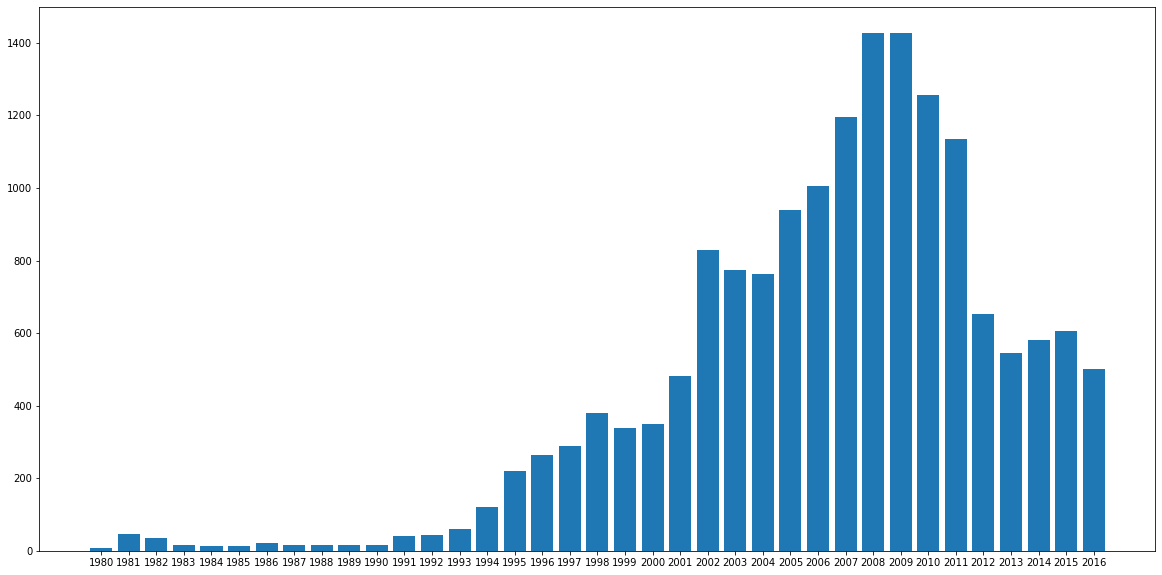

In [15]:
bar_func(games_count)

Исходя из изложенных выше данных, актуальный период должен начинаться после 1995 года. Данные до 1995 года мы не будем учитывать, т.к. выпускалось крайне мало игр. Проведем дальнейший анализ для определения актуального периода.

In [16]:
games=games.query('year_of_release>=1995')
print(games['year_of_release'].unique())

[2006 2008 2009 1996 2005 1999 2007 2010 2013 2004 2002 2001 2011 1998
 2015 2012 2014 1997 2016 2003 2000 1995]


Определим платформы с наибольшими суммарными продажами

In [17]:
games_sell_summ=games.pivot_table(index="platform",values=["na_sales","eu_sales","jp_sales","other_sales",'summ_sell'],aggfunc='sum').reset_index()
games_sell_summ=games_sell_summ.sort_values(by=["summ_sell"],ascending = False)
display(games_sell_summ)

,platform,eu_sales,jp_sales,na_sales,other_sales,summ_sell
12,PS2,332.63,137.54,572.92,190.47,1233.56
23,X360,268.32,12.30,595.74,84.88,961.24
13,PS3,327.21,79.41,390.13,134.59,931.34
21,Wii,258.32,68.28,486.87,77.71,891.18
3,DS,188.41,175.00,380.31,59.04,802.76
11,PS,211.19,137.11,332.96,40.29,721.55
14,PS4,141.09,15.96,108.74,48.35,314.14
5,GBA,74.59,46.56,184.12,7.61,312.88
15,PSP,65.62,75.88,107.27,40.76,289.53
1,3DS,61.27,100.62,82.65,13.27,257.81


Лидером рейтинга является платформа PS2. Это действительно легендарная приставка, которая за многие годы успела себя зарекомендовать.
Однако тем не менее, это заслуга компании Sony, а не отдельно взятой консоли. Так как целью данного исследования является определение ПОТЕНЦИАЛЬНО популярныого продукта, то нам нужно выявить критерий , показывающий перспективность игровой платформы. Допустим, что если  последние три года на рассматриваемую консоль выходили игры, то она перспективна. В обратном случае считаем, что производитель провел  модернизацию и выпустил на рынок новый продукт.

Определим как часто выходят новые и исчезают старые платформы. Сгрупируем данные по кол-ву игр на консоли в каждом году и построим тепловую карту этой матрицы.

In [18]:
games_platforms=games.pivot_table(index="year_of_release",values="name",columns='platform',aggfunc='count').reset_index()
#plt.figure(figsize=(10,10))
#sns.heatmap(games_platforms)

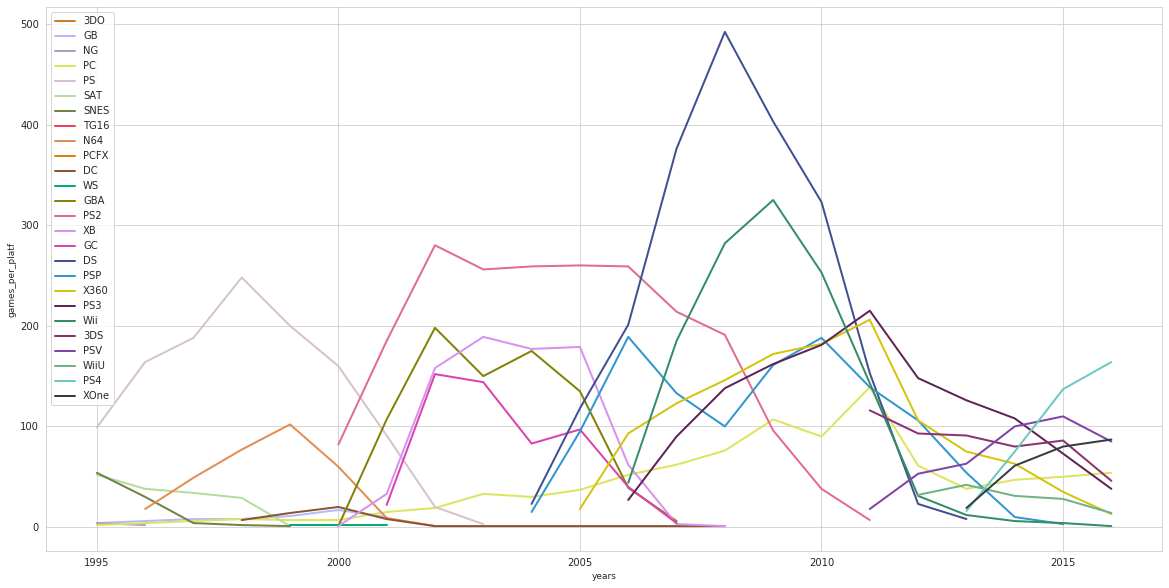

In [19]:
games_platforms_1=games.pivot_table(index=["year_of_release","platform"],values="name",aggfunc='count').reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('viridis')
for i in games_platforms_1["platform"].unique():
    df_pl=games_platforms_1[games_platforms_1["platform"]==i]
    plt.plot( 'year_of_release', 'name', data=df_pl,  color='#{:06x}'.format(random.randint(0, 256**3)), linewidth=2)
    plt.legend(games_platforms_1["platform"].unique(),loc='upper left',fontsize=10)
    plt.xlabel("years",fontsize=9)
    plt.ylabel("games_per_platf",fontsize=9)




Как видно, примерно каждые пять лет крупные компании выпускают новый продукт, и примерно через несколько лет после этого старая консоль перестает быть востребованной на рынке.

Допустим, что если последние три года приставка пользуется спросом, то мы берем ее в рассмотрение.

In [20]:
last_years=games_platforms[games_platforms['year_of_release'].isin(['2014','2015','2016'])].dropna(axis = 1, how ='any')
print(last_years)

platform  year_of_release   3DS    PC    PS3    PS4    PSV  Wii  WiiU  X360  \
19                   2014  80.0  47.0  108.0   75.0  100.0  6.0  31.0  63.0   
20                   2015  86.0  50.0   73.0  137.0  110.0  4.0  28.0  35.0   
21                   2016  46.0  54.0   38.0  164.0   85.0  1.0  14.0  13.0   

platform  XOne  
19        61.0  
20        80.0  
21        87.0  


Как и ожидалось, в списке рассматриваемых платформ последние консоли и персональный компьютер.

Определим функцию для сравнения графиков суммарной

In [21]:
def graf_platf(df):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,10))
    colors=['blue','red','black','green','orange','yellow','gray','purple','salmon']
    j=0
    for i in df["platform"].unique():
        df_pl=df[df["platform"]==i]
        plt.plot( 'year_of_release', 'summ_sell', data=df_pl,  color=colors[j], linewidth=2)
        plt.legend(df["platform"].unique(),loc='upper left',fontsize=10)
        plt.xlabel("years",fontsize=9)
        plt.ylabel("summ_sell",fontsize=9)
        j+=1

In [22]:
games_sell_summ_year=games[games["platform"].isin(last_years.columns)].pivot_table(index=["year_of_release","platform"],values=["na_sales","eu_sales","jp_sales","other_sales",'summ_sell'],aggfunc='sum').reset_index()
display(games_sell_summ_year)

,year_of_release,platform,eu_sales,jp_sales,na_sales,other_sales,summ_sell
0,1995,PC,2.27,0.00,1.72,0.23,4.22
1,1996,PC,4.68,0.00,5.56,0.34,10.58
2,1997,PC,2.19,0.09,8.76,0.23,11.27
3,1998,PC,0.20,0.00,3.05,0.01,3.26
4,1999,PC,1.13,0.00,3.50,0.11,4.74
...,...,...,...,...,...,...,...
76,2016,PSV,0.39,3.56,0.15,0.15,4.25
77,2016,Wii,0.11,0.00,0.06,0.01,0.18
78,2016,WiiU,1.48,0.67,2.10,0.35,4.60
79,2016,X360,0.71,0.00,0.69,0.12,1.52


За начало актуального периода примем год, когда все наши сравниваемые платформы были на рынке. Актуальный период 2013-2016 гг.

In [23]:
games_sell_summ_year=games_sell_summ_year.query('year_of_release>=2013')

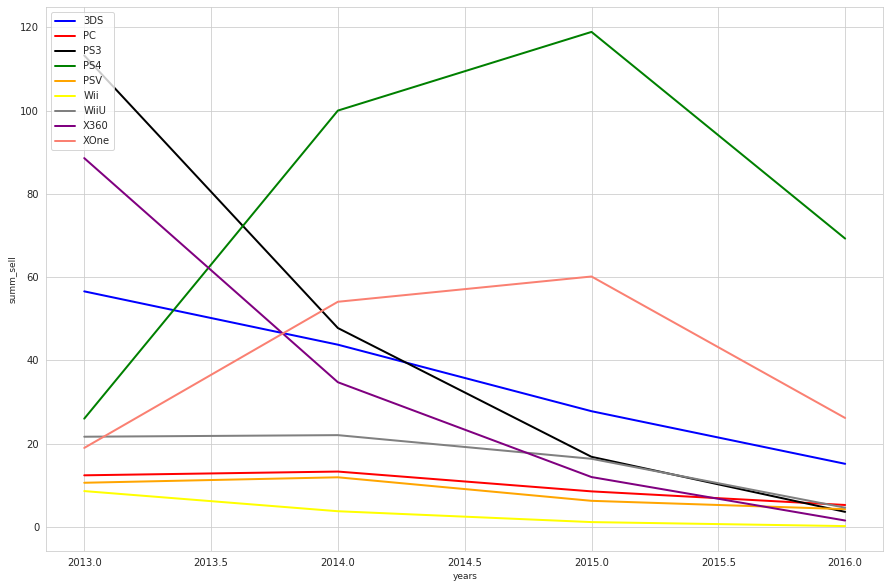

In [24]:
graf_platf(games_sell_summ_year)

Из графика видно, что самыми востребованными на данный момент платформами являются XOne и PS4.Пик популярности X360.Wii и PS3 прошел, и им на смену пришло новое поколение.WiiU по сравнению с конкурентами так и не набрал популярности. Персональный компьютер, в свою очередь, всегда оставался на одном уровне актуальности. 

Определим функцию для построения графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [25]:
def boxplot_show(df):
    for i in df["platform"].unique():
        df_pl=df[df["platform"]==i]
        df_pl.boxplot(column =['summ_sell'], grid = True)
        plt.xlabel(i,fontsize=9)
        plt.show()
        
        

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам

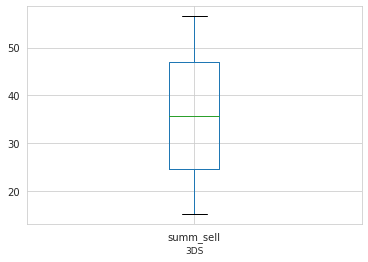

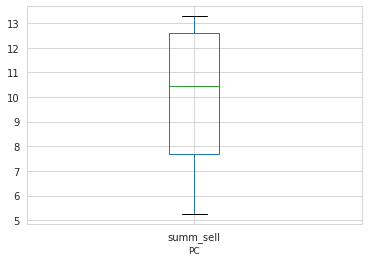

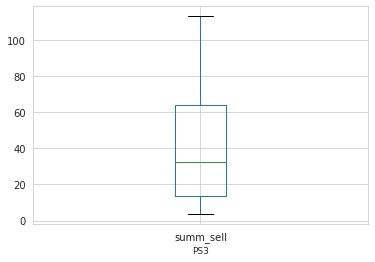

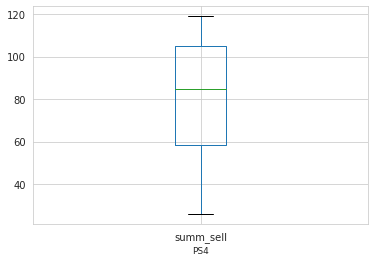

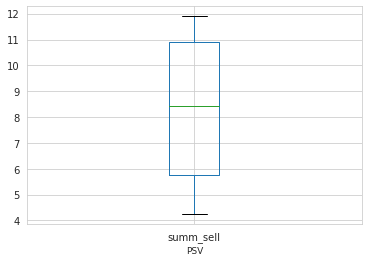

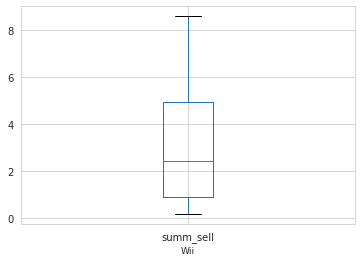

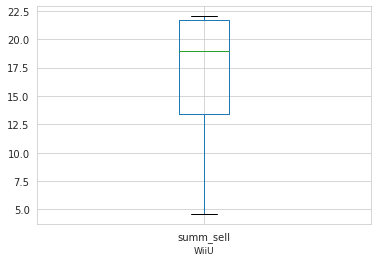

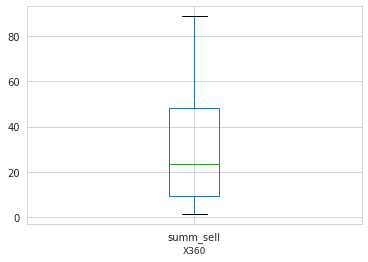

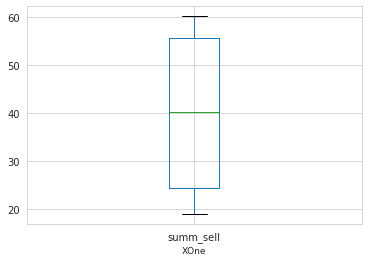

In [26]:
boxplot_show(games_sell_summ_year)

Меньшая длина усов, свидетельствует, о том, что больше игр на рассматриваемой консоли пользовались должным уровнем успеха, и по этим значениям можно судить и об общем отношении геймеров к этой платформе. Большие же выбросы говорят о редких жемчужинах и провалах, на этих консолях игры выходят с переменным успехом. В нашем случае XOne ведет себя достаточно стабильно, Wii показывает либо стабильные, либо очень хорошие результаты. 

In [27]:
def graf(df):
    for i in df["platform"].unique():
        plt.figure(figsize=(7,7))
        
        plt.subplot(121)
        plt.subplots_adjust(wspace=0.6, hspace=0)
        plt.plot( 'critic_score', 'summ_sell',linestyle='none', data=df[df["platform"]==i], marker='o', alpha=0.7)
        plt.xlabel(i+' critic_score',fontsize=15)
        plt.ylabel('summ_sell',fontsize=15)
        

        plt.subplot(122)
        plt.plot( 'user_score', 'summ_sell',linestyle='none', data=df[df["platform"]==i], marker='o', alpha=0.7, color="orange")
        plt.xlabel(i+' user_score',fontsize=15)
        plt.ylabel('summ_sell',fontsize=15)
        plt.show()
        
        plt.figure(figsize=(5,5))
        sns.heatmap(df[df["platform"]==i][['critic_score','user_score','summ_sell']].corr(), annot = True)
        plt.xlabel(i+" correlation",fontsize=15)

Определим корреляцию между рейтингами и продажами. В рассматриваемый датафрейм включены игры актуального периода рассмотрения на платформах, которые мы принимаем к рассмотрению в комерческих целях.

In [28]:
game_cons=games[games["platform"].isin(last_years.columns)].query("year_of_release>=2013")


Построим диаграммы рассеяния и корреляции.

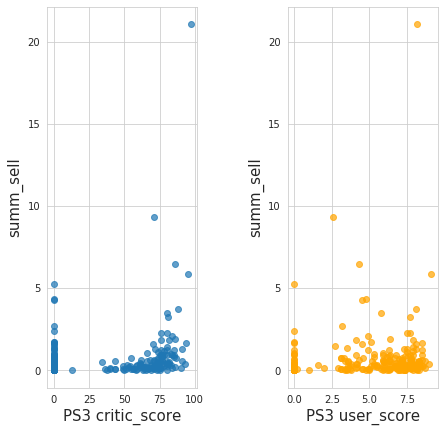

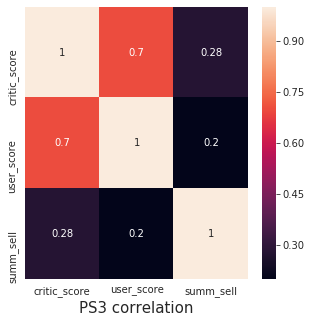

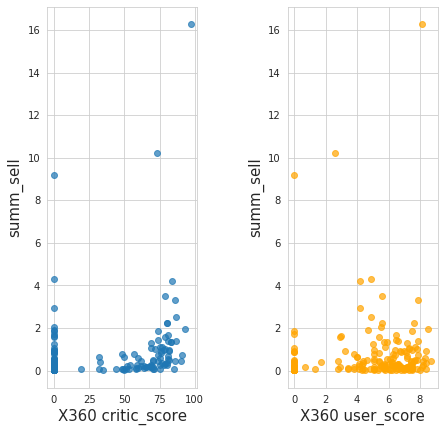

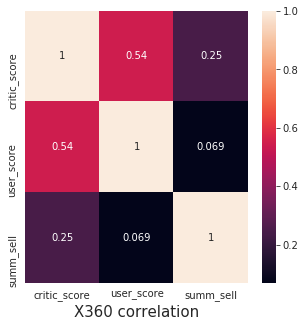

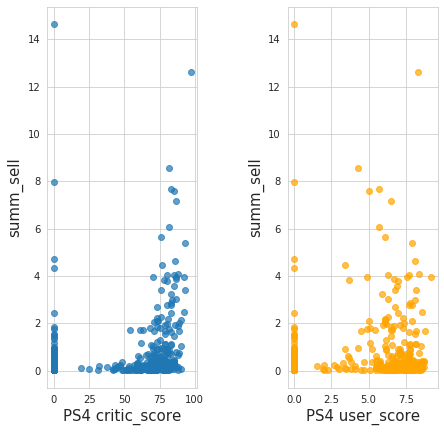

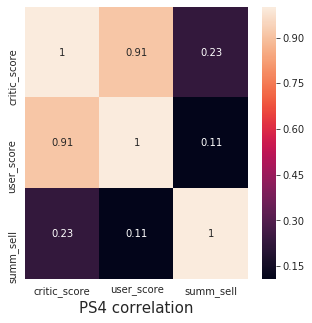

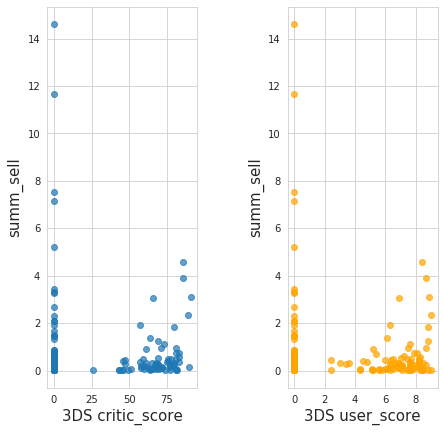

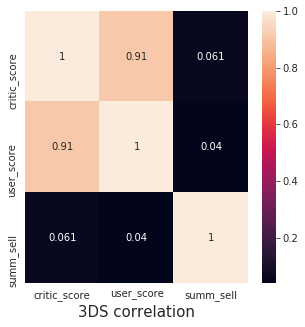

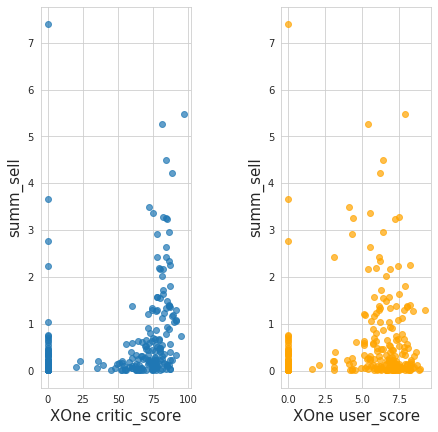

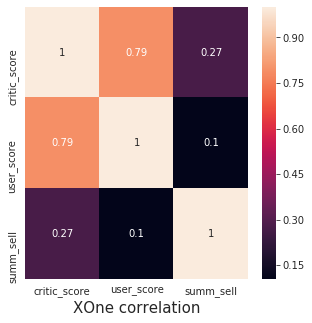

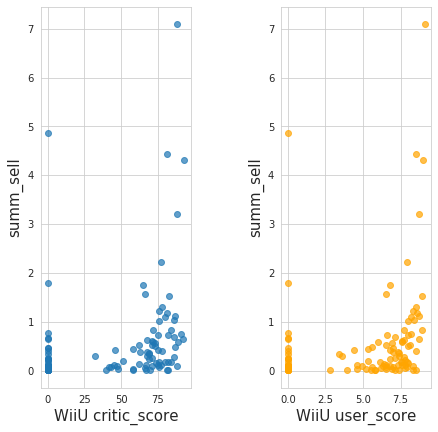

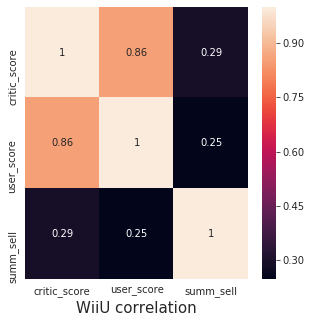

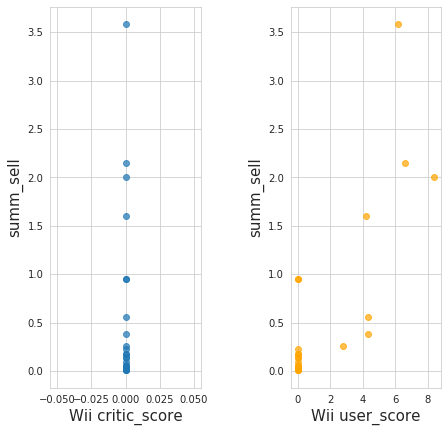

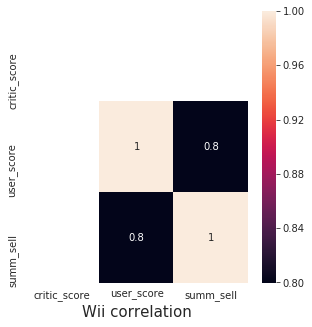

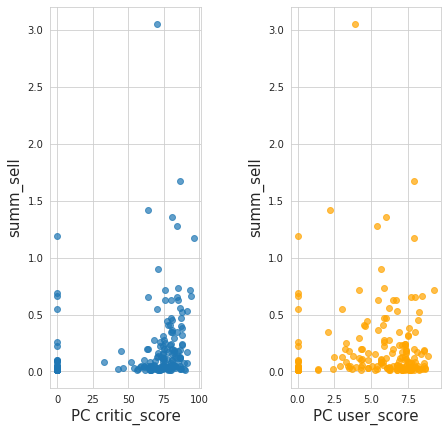

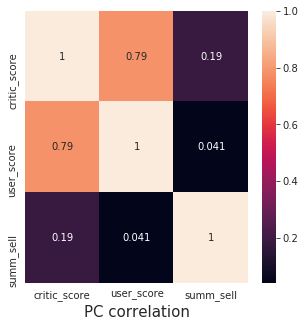

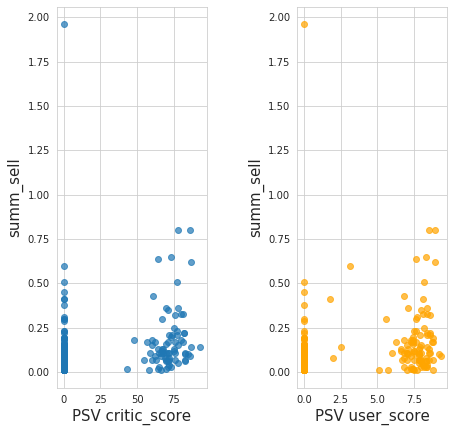

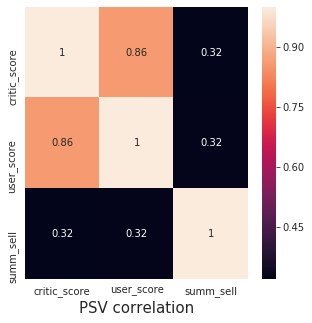

In [29]:
graf(game_cons)

Мы наблюдаем сильную взаимосвязь между рейтингами у уровнем продаж на всех рассматриваемых платформах. Самая сильная корреляция на платформе PSV , а самая слабая на 3DS. Примечательно, что для персонального компьютера экспертная оценка гораздо сильнее влияет, чем пользовательская. 
Так же во всех данных есть выбросы возле нуля. Это недостоющие данные, которые мы заменили.В некоторых случаях, они имеют хорошие продажи. Это могут быть серии игр с узким, но верным лагерем приверженцев какой-либо серии.

Оценим прибыльность игр по жанрам

In [30]:
games_genre=game_cons.pivot_table(index="genre",values="summ_sell",aggfunc='sum').reset_index()
display(games_genre)

,genre,summ_sell
0,Action,320.51
1,Adventure,22.90
2,Fighting,35.29
3,Misc,62.57
4,Platform,41.94
5,Puzzle,3.17
6,Racing,39.89
7,Role-Playing,144.86
8,Shooter,232.98
9,Simulation,21.55


Определим функцию, визуализирующую суммарные продажи по жанрам

In [31]:
def bar_genre(df):
    plt.figure(figsize=(15,5))
    height = df['summ_sell']
    bars = df['genre']
    y_pos = np.arange(len(bars))

    plt.bar(y_pos, height)

    plt.xticks(y_pos, bars)

    plt.show()

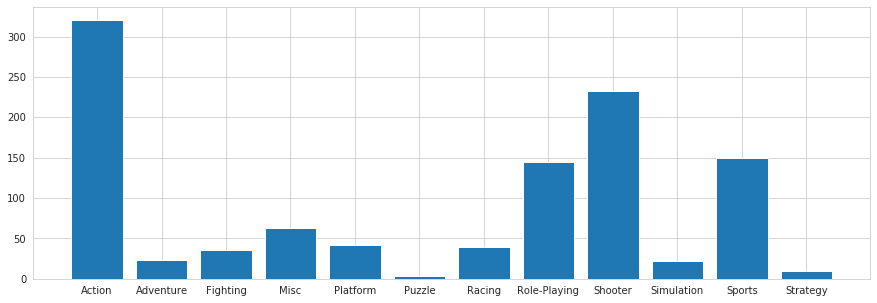

In [32]:
bar_genre(games_genre)

Мы выявили, что выделяются жанры с высокими продажами(такие как Action,Shooter,Sports) и с низкими ( такие как Puzle и Strategy)

Предварительный вывод: мы определились с актуальным периодом рассмотрения ( 2013-2015 гг). Это интервал, когда все актуальные в данный момент консоли были на рынке. Наиболее перспективными являются консоли PS4 и XOne. Самые популярные жанры это Action,Shooter и Sports. При чем при выборе продукта необходимо учитывать как пользовательские, так и экспертные оценки, т.к. это напрямую влияет на продажи.

# Шаг 4. Составьте портрет пользователя каждого региона

Определим функцию, отражающую самые популярные платформы для каждого региона.

In [33]:
def platf_reg(df):
    for i in ["na_sales","eu_sales","jp_sales","other_sales"]:
        platf_reg=df.pivot_table(index="platform",values=i,aggfunc='sum').reset_index().sort_values(by=i,ascending = False)
        print(platf_reg.head(5))
        
        plt.figure(figsize=(15,5))
        height = platf_reg[i]
        bars = platf_reg["platform"]
        y_pos = np.arange(len(bars))
        plt.bar(y_pos, height)
        plt.xticks(y_pos, bars)
        plt.xlabel(i,fontsize=15)
        plt.show()
        
        

Определим функцию, отражающую самые популярные жанры для каждого региона.

In [34]:
def gen_reg(df):
    for i in ["na_sales","eu_sales","jp_sales","other_sales"]:
        genre_reg=df.pivot_table(index="genre",values=i,aggfunc='sum').reset_index().sort_values(by=i,ascending = False)
        print(genre_reg.head(5))
        
        plt.figure(figsize=(15,5))
        height = genre_reg[i]
        bars = genre_reg["genre"]
        y_pos = np.arange(len(bars))
        plt.bar(y_pos, height)
        plt.xticks(y_pos, bars)
        plt.xlabel(i,fontsize=15)
        plt.show()

Определим функцию, отражающую зависимость уровня продаж от рейтинга игры.

In [35]:
def rating(df):
    for i in ["na_sales","eu_sales","jp_sales","other_sales"]:
        plt.figure(figsize=(7,7))
        
        plt.subplots_adjust(wspace=0.6, hspace=0)
        plt.plot( 'rating', i,linestyle='none', data=df, marker='o', alpha=0.7)
        plt.xlabel('rating',fontsize=15)
        plt.ylabel(i,fontsize=15)
        


Возьмем выборку данных за актуальный рассматриваемый период

In [36]:
region_compare=games.query("year_of_release>=2013")

Сравним популярность платформ в разных регионах

   platform  na_sales
4       PS4    108.74
10     XOne     93.12
9      X360     81.66
3       PS3     63.50
0       3DS     38.20


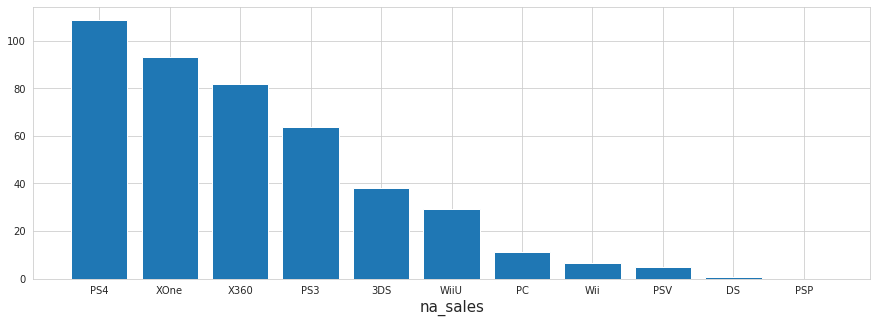

   platform  eu_sales
4       PS4    141.09
3       PS3     67.81
10     XOne     51.59
9      X360     42.52
0       3DS     30.96


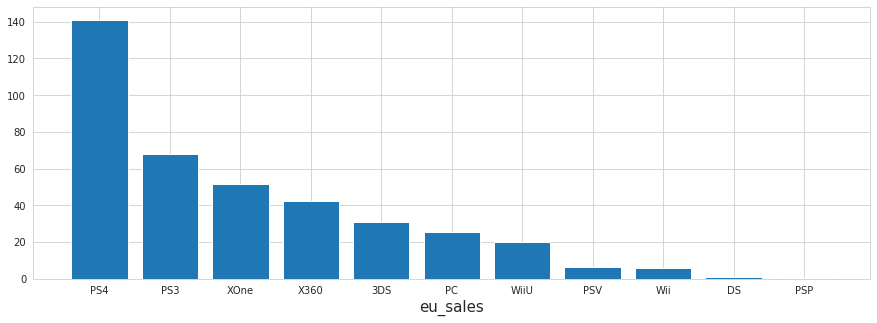

  platform  jp_sales
0      3DS     67.81
3      PS3     23.35
6      PSV     18.59
4      PS4     15.96
8     WiiU     10.88


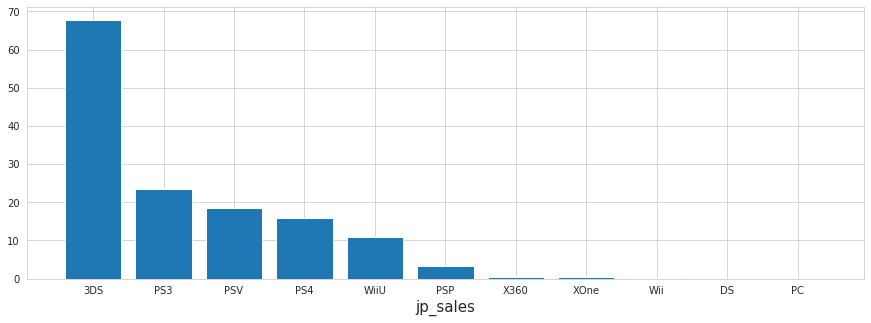

   platform  other_sales
4       PS4        48.35
3       PS3        26.77
10     XOne        14.27
9      X360        12.11
0       3DS         6.28


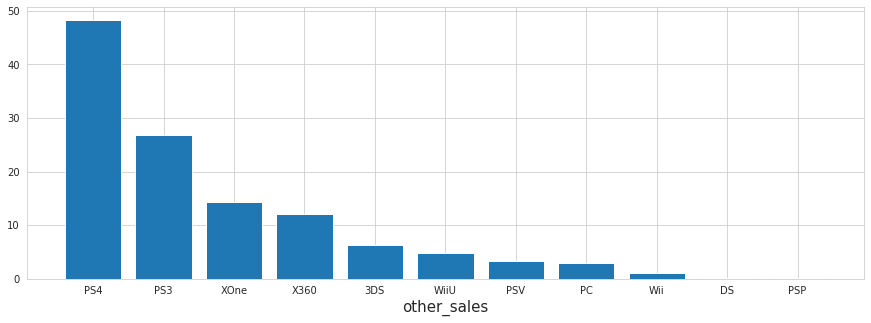

In [37]:
platf_reg(region_compare)

Почти везде лидируют две конкурирующие компании Microsoft и Sony. Самыми популярными приставками в США, европе и других регионах являются PS3 и X360. Япония выделяется не только своим менталитетом и патриотизмом, но и рыночными предпочтениями: там самые популярные приставки- детища Nintendo и Sony (DS,3DS,PS3).

Приставка Wii во всех странах с переменным успехом входит в пятерку лучших, но из-за особенностей геймплея не занимает первое место.

           genre  na_sales
0         Action    126.05
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49


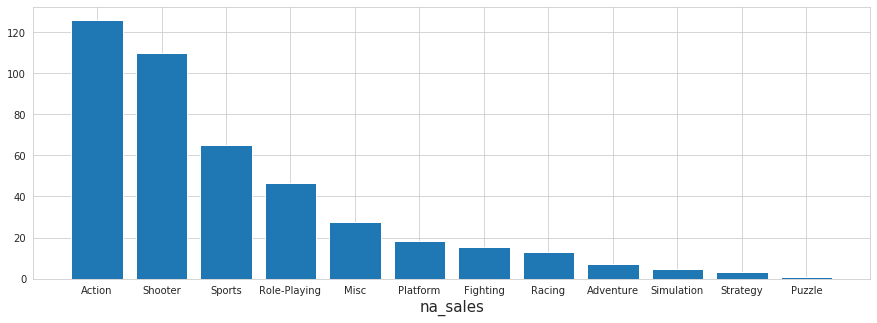

           genre  eu_sales
0         Action    118.13
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19


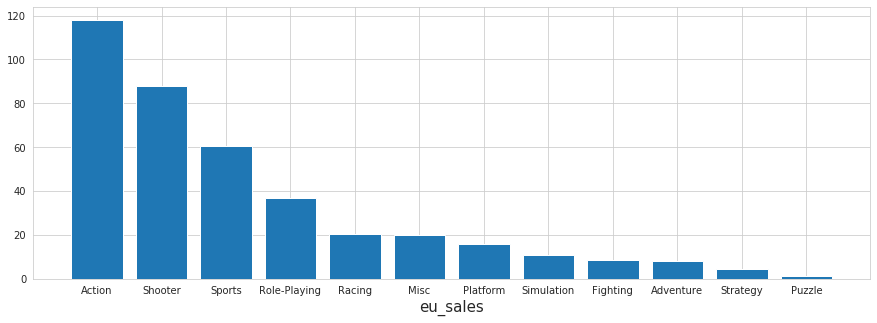

          genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61


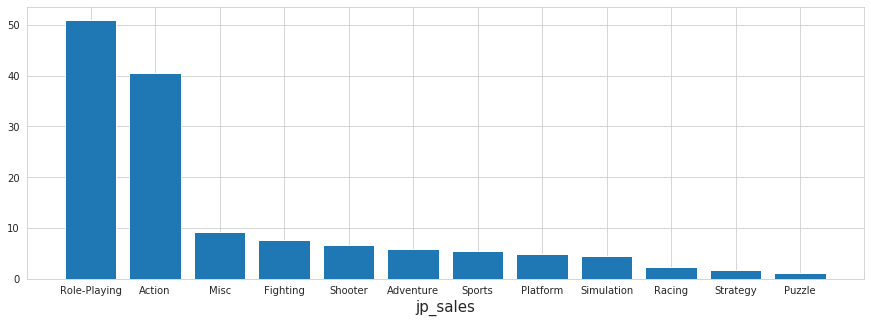

           genre  other_sales
0         Action        37.20
8        Shooter        28.77
10        Sports        19.45
7   Role-Playing        11.48
3           Misc         6.09


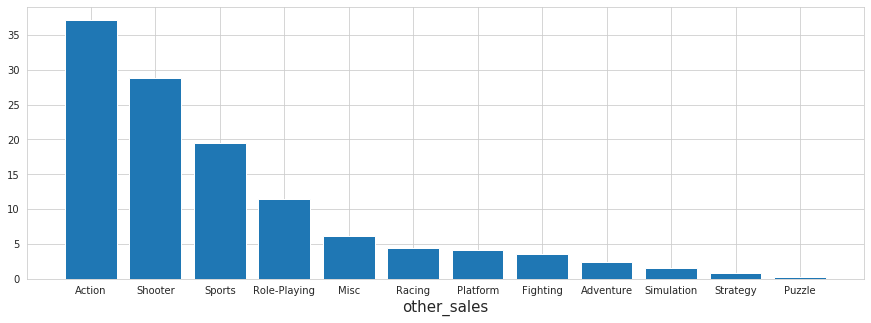

In [38]:
gen_reg(region_compare)

Самые популярные жанры во всем мире :Action,Sports и Shooter. Однако особенности японской потребительской психологии проявились и здесь, самые популярные жанры в Японии:Role-Playing,Action и Misc.

Для каждого региона отобразим зависимость уровня продаж от рейтинга игры.

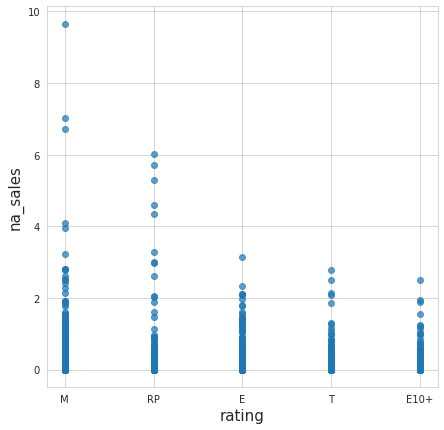

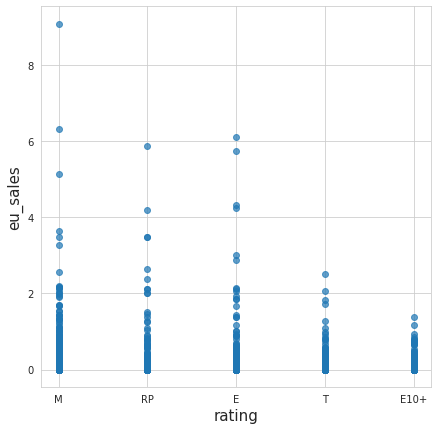

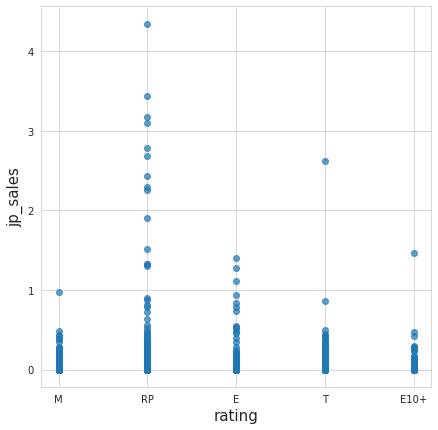

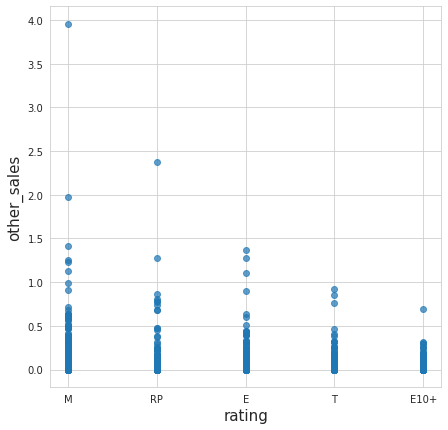

In [39]:
rating(region_compare)

Как мы видим, самыми популярными рейтингами во всем мире являются «E» (Everyone) и M («Mature»). Рейтинги AO («Adults Only 18+») и EC («Early childhood») расчитаны на специализированную узкую аудиторию и не набирают большого кол-ва продаж.

Однако Япония как всегда выделяется из общей картины, в этой стране популярны рейтинги E10+ («Everyone 10 and older») и «T» («Teen»).

Рейтинг «RP» («Rating Pending») мы не рассматриваем, т.к. он подразумевает под собой любой другой рейтинг.

Портреты пользователей (предварительный вывод аналогичен, нет смысла перепечатывать одно и то же):
1) портреты европейского , американского и пользователей, входящих в категорию "другие" схожи.
   Они выбирают самые популярные консоли (PS4 и XOne), самые раскрученные игры (Action,Shooter,Sports) и ориентированы на    категорию "Е".
2) 'Странноватые' японцы отличаются от всего остального мира. Они поддерживают отечественного производителя (3DS и PS3),     играют в Role-Playing,Action и Misk. И на удивление популярностью пользуется рейтинг М (и скорее всего, дело не в         среднем возрасте покупателя, а в менталитете)


# Шаг 5. Проверьте гипотезы

Определим функцию для построения гистограм плотности распределения среднего пользовательского рейтинга

In [40]:
def graf_hist(df1,df2,label1,label2):

    plt.figure(figsize=(7,7))

    plt.subplot(121)
    plt.subplots_adjust(wspace=0.6, hspace=0)
    df1['user_score'].hist(density=True,bins=20)
    plt.xlabel(label1,fontsize=15)



    plt.subplot(122)
    df2['user_score'].hist(density=True,bins=20)
    plt.xlabel(label2,fontsize=15)
    plt.show()

Определим функцию, проверяющую гипотезу о равенстве средних двух генеральных совокупностей

In [41]:
def gipot(df1,df2):
    alpha = 0.05
    results = st.ttest_ind(df1['user_score'],df2['user_score'],equal_var = False)
    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Проверим равны ли средние пользовательские рейтинги для платформ "Xbox One" и "PC"
Построим плотности распределения пользовательские рейтингов по двум рассматриваемым платформам.

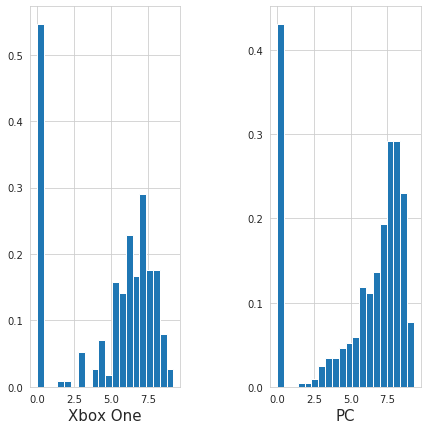

In [42]:
graf_hist(games.query('platform=="XOne"'),games.query('platform=="PC"'),"Xbox One","PC")


На обоих гистограммах мы видим сильные выбросы в зоне нуля. Это недостающие данные, которые мы приравняди нулю. Для проверки нулевой теолрии нужно избавиться от этих выбросов.




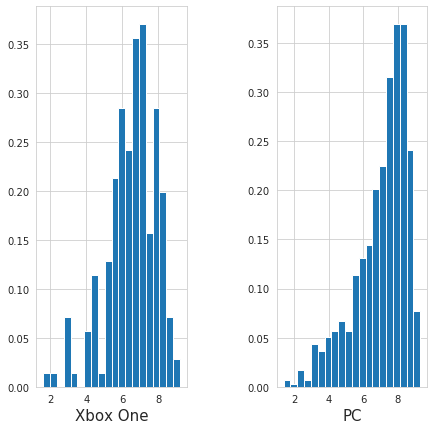

In [43]:
games_h0=games.query('user_score!=0')
graf_hist(games_h0.query('platform=="XOne"'),games_h0.query('platform=="PC"'),"Xbox One","PC")

Проверим одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC. Для проверки равенства средних двух совокупностей будем использовать t-критерий Стьюдента.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [44]:
gipot(games_h0.query('platform=="XOne"'),games_h0.query('platform=="PC"'))

p-значение: 2.163945270720963e-06
Отвергаем нулевую гипотезу


Подтверждена альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Проверим равны ли средние пользовательские рейтинги для жанров  Action  и Sports
Построим плотности распределения пользовательские рейтингов по двум рассматриваемым платформам.

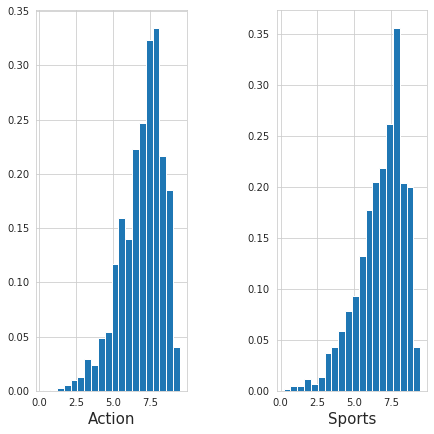

In [45]:
graf_hist(games_h0.query('genre=="Action"'),games_h0.query('genre=="Sports"'),"Action","Sports")

Проверим одинаковые ли средние пользовательские рейтинги для жанров  Action  и Sports. Для проверки равенства средних двух совокупностей будем использовать t-критерий Стьюдента.

Нулевая гипотеза - средние пользовательские рейтинги для жанров  Action  и Sports равны. Альтернативная гипотеза - средние пользовательские рейтинги для жанров  Action  и Sports различаются.

In [46]:
gipot(games_h0.query('genre=="Action"'),games_h0.query('genre=="Sports"'))

p-значение: 0.09855825645130381
Не получилось отвергнуть нулевую гипотезу


Подтверждена нулевая гипотеза: средние пользовательские рейтинги для жанров Action и Sports равны.

Предварительный вывод:методом статистического анализа мы выяснили:
1)что средние пользовательские рейтинги платформ Xbox One и PC различаются
2)средние пользовательские рейтинги для жанров Action и Sports равны

# Шаг 6. Напишите общий вывод

Мы выявили определяющие успешность игры закономерности. Для спланированной рекламной кампании на 2017 год нужно делать ставку на платформы XONE  и PS4 (особенно для японского рынка). Рекламировать необходимо жанры Action  и Sports категории Е (для всех). Особенно стоит уделить вниманию альфатестированию игр и предварительным оценкам пользователей и экспертов, т.к. их рейтинги очень сильно влияют на продажи.